In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
melluso = pd.read_csv(r'C:\Users\alfim\Desktop\EPICODE\Esami e Build Week\Build Week\Python\melluso_finale.csv')
duelune = pd.read_csv(r'C:\Users\alfim\Desktop\EPICODE\Esami e Build Week\Build Week\Python\duelune_finale.csv')

In [4]:
confronto = pd.concat([melluso , duelune])
confronto

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,decollete,nude,125.00,125.0,0.0,Melluso
1,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0,Melluso
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,134.91,149.9,10.0,Melluso
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0,Melluso
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0,Melluso
...,...,...,...,...,...,...,...,...,...,...
399,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,Sandalo,Bianco,59.90,59.9,0.0,duelune
400,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,Sandalo,Cuoio,59.90,59.9,0.0,duelune
401,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,Sandalo,Nero,59.90,59.9,0.0,duelune
402,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,Sandalo,Grigio,59.90,59.9,0.0,duelune


In [5]:
confronto.Prezzo_originale.unique()

array([125. ,  50. , 149.9, 159.9, 139.9, 129.9, 169.9, 165. , 145. ,
        89.9, 119.9, 155. ,  99.9,  69.9,  79.9, 179.9, 109.9,  99. ,
        89. ,   nan, 189.9, 205. , 175. , 185. , 199.9, 109. , 195. ,
       219.9,  39.9,  59.9,  49.9,  55. ,  45. , 159. , 104.9,  94.9,
        84.9,  74.9, 144.9, 134.9,  54.9, 124. , 114.9])

In [6]:
confronto.Prezzo_finale.unique()

array([125.  ,  50.  , 134.91, 104.93, 111.93, 125.91,  97.93, 116.91,
        90.93, 135.92, 132.  , 115.5 , 127.92, 116.  , 119.92, 143.91,
        71.92,  95.92, 124.  ,  79.92, 129.9 , 149.9 , 139.9 , 152.91,
       118.93, 159.9 , 143.92,  87.92, 103.92, 108.5 , 111.92,  79.2 ,
        71.2 ,    nan, 100.  , 151.92, 164.  , 140.  , 148.  , 159.92,
        87.2 , 156.  , 175.92,  31.92,  47.92,  39.92,  38.5 ,  36.  ,
       130.5 ,  62.91,  80.91,  71.91, 155.  , 127.2 , 161.91, 170.91,
       165.  , 148.5 ,  99.9 ,  79.9 , 104.9 ,  89.9 ,  84.9 ,  94.9 ,
        59.9 ,  74.9 ,  69.9 , 124.9 , 119.9 , 144.9 , 134.9 , 109.9 ,
        54.9 , 114.9 , 179.9 ])

In [7]:
vuoto = confronto.Prezzo_originale.isna() == True
confronto[vuoto]

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
291,Mocassino donna in pelle nero x5327w,x5327w,donna,donna-mocassini,mocassino,nero,NaN,NaN,NaN,Melluso
333,Tronchetto donna in camoscio bordo l5331w,l5331w,donna,stivaletti,tronchetto,bordo,NaN,NaN,NaN,Melluso
340,Tronchetto donna in pelle blu navy r35600w,r35600w,donna,stivaletti,tronchetto,navy,NaN,NaN,NaN,Melluso
532,Mocassino donna in pelle nero x5327w,x5327w,donna,tacchi-comodi,mocassino,nero,NaN,NaN,NaN,Melluso
678,Tronchetto donna in pelle blu navy r35600w,r35600w,donna,tacchi-comodi,tronchetto,navy,NaN,NaN,NaN,Melluso


In [8]:
confronto = confronto.dropna(subset=['Prezzo_originale' , 'Prezzo_finale'])
confronto

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,decollete,nude,125.00,125.0,0.0,Melluso
1,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0,Melluso
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,134.91,149.9,10.0,Melluso
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0,Melluso
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0,Melluso
...,...,...,...,...,...,...,...,...,...,...
399,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,Sandalo,Bianco,59.90,59.9,0.0,duelune
400,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,Sandalo,Cuoio,59.90,59.9,0.0,duelune
401,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,Sandalo,Nero,59.90,59.9,0.0,duelune
402,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,Sandalo,Grigio,59.90,59.9,0.0,duelune


In [9]:
confronto.loc[confronto['Sconto'] < 0, 'Prezzo_originale'] = confronto.loc[confronto['Sconto'] < 0, 'Prezzo_finale']

confronto.iloc[90:93]

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
90,Décolleté donna in pelle blu abyss d160zv,d160zv,donna,decollete,decollete,abyss,149.9,149.9,-114.449213,Melluso
91,Décolleté donna in pelle lilla d160zv,d160zv,donna,decollete,decollete,lilla,149.9,149.9,-66.740823,Melluso
92,Décolleté donna slingback in tessuto rosa phar...,d165z,donna,decollete,decollete,phard,149.9,149.9,-66.740823,Melluso


In [10]:
confronto["Sconto"] = ((confronto.Prezzo_originale - confronto.Prezzo_finale)/confronto.Prezzo_originale)*100

C:\Users\alfim\AppData\Local\Temp\ipykernel_341920\4083680597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confronto["Sconto"] = ((confronto.Prezzo_originale - confronto.Prezzo_finale)/confronto.Prezzo_originale)*100


In [11]:
confronto.iloc[90:93]

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
90,Décolleté donna in pelle blu abyss d160zv,d160zv,donna,decollete,decollete,abyss,149.9,149.9,0.0,Melluso
91,Décolleté donna in pelle lilla d160zv,d160zv,donna,decollete,decollete,lilla,149.9,149.9,0.0,Melluso
92,Décolleté donna slingback in tessuto rosa phar...,d165z,donna,decollete,decollete,phard,149.9,149.9,0.0,Melluso


In [12]:
confronto['Quantita'] = 1

C:\Users\alfim\AppData\Local\Temp\ipykernel_341920\1840311485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confronto['Quantita'] = 1


In [13]:
confronto

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda,Quantita
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,decollete,nude,125.00,125.0,0.0,Melluso,1
1,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0,Melluso,1
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,134.91,149.9,10.0,Melluso,1
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0,Melluso,1
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0,Melluso,1
...,...,...,...,...,...,...,...,...,...,...,...
399,Sandalo Ciabatta U106 Bianco,Ciabatta,uomo,sandali,Sandalo,Bianco,59.90,59.9,0.0,duelune,1
400,Sandalo Ciabatta U104 Nabuck Cuoio,Ciabatta,uomo,sandali,Sandalo,Cuoio,59.90,59.9,0.0,duelune,1
401,Sandalo Ciabatta U104 Nabuck Nero,Ciabatta,uomo,sandali,Sandalo,Nero,59.90,59.9,0.0,duelune,1
402,Sandalo Ciabatta U117 Grigio,Ciabatta,uomo,sandali,Sandalo,Grigio,59.90,59.9,0.0,duelune,1


# ANALISI:

# Analisi 1 e 2: numero di categorie e quali sono; quanti prodotti per categoria

In [16]:
analisi_1 = confronto.groupby(['Azienda','Categoria']).Quantita.agg(Quantità = ('sum'))
analisi_1

Quantità
Azienda Categoria                           
Melluso cerimonia                         63
        classiche                         30
        decollete                        174
        donna-mocassini                  103
        melluso-donna-stivali-html        15
        mocassini-uomo                    35
        pantofole                         28
        sneakers                          56
        stivaletti                        94
        tacchi-alti                       82
        tacchi-comodi                    257
duelune ballerine                         31
        decollete                         73
        doppia-fibbia                      4
        goodyear-welted                    3
        mocassini-slipon                  27
        polacchine                         8
        sandali                           51
        scarpe-basse                      25
        sneakers                         103
        stivaletti                        23
        stivali                           39
        stringate                         17

<Axes: title={'center': 'Quantità prodotti x azienda'}, ylabel='Colore'>

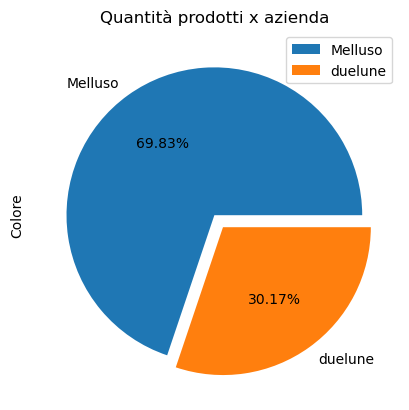

In [17]:
Analisi_prodotti = confronto.groupby('Azienda').count()
Analisi_prodotti.plot(kind='pie' , y='Colore' , autopct='%.2f%%' , explode=(0,0.1) , title='Quantità prodotti x azienda')

Text(0.5, 1.0, 'Prodotti x Categorie')

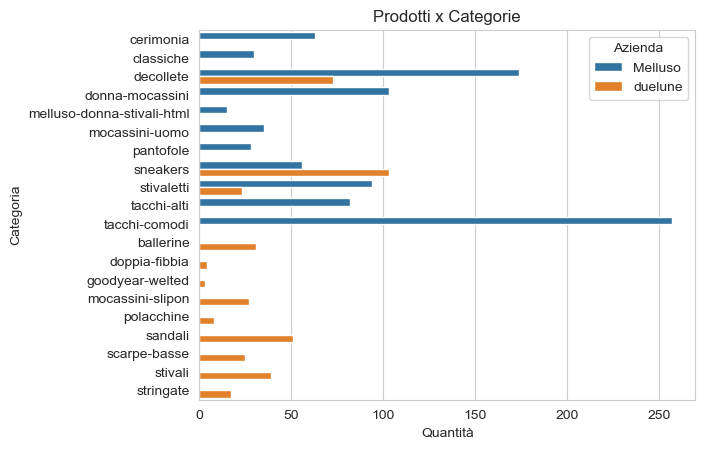

In [18]:
sns.set_style('whitegrid')
analisi_prodotti_categorie = sns.barplot(data=analisi_1 , x='Quantità' , y='Categoria' , hue='Azienda' , orient='h')
analisi_prodotti_categorie.set_title('Prodotti x Categorie')

# Analisi 3: Differenza medie prezzi

In [94]:
Analisi_media_prezzi = confronto.groupby('Azienda').Prezzo_originale.agg(Media = ('mean'))
Analisi_media_prezzi

,Media
Azienda,
Melluso,142.700421
duelune,97.083911


<Axes: title={'center': 'Media prezzi originali'}, xlabel='Azienda'>

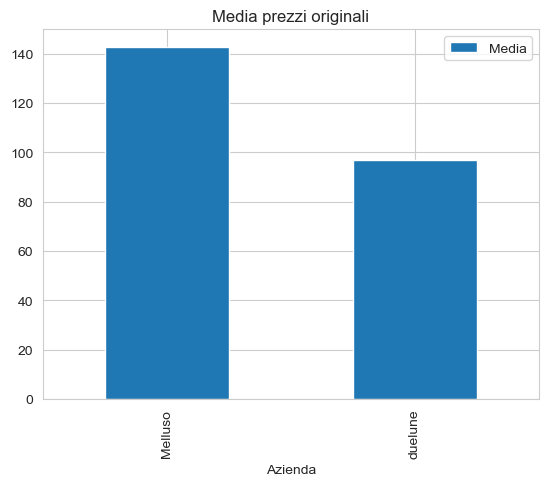

In [96]:
Analisi_media_prezzi.plot(kind='bar',y='Media',title='Media prezzi originali')

In [110]:
Analisi_media_prezzi_scontati = confronto.groupby('Azienda').Prezzo_finale.agg(Media = ('mean'))
Analisi_media_prezzi_scontati

,Media
Azienda,
Melluso,120.359737
duelune,95.375990


<Axes: title={'center': 'Media prezzi scontati (prezzi finali)'}, xlabel='Azienda'>

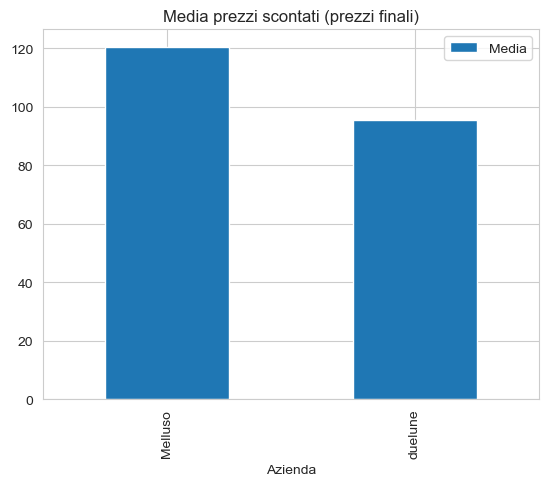

In [76]:
Analisi_media_prezzi_scontati.plot(kind='bar',y='Media',title='Media prezzi scontati (prezzi finali)')

# Analisi 4: distrubuzione dei prezzi

Text(0.5, 1.0, 'distribuzione prezzi originali')

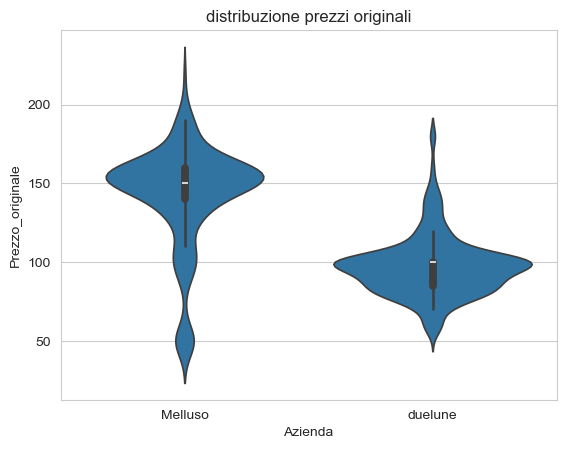

In [123]:
Analisi_distribuzione_prezzi = sns.violinplot(data=confronto,x='Azienda',y='Prezzo_originale')
Analisi_distribuzione_prezzi.set_title('distribuzione prezzi originali')

Text(0.5, 1.0, 'Distribuzione prezzi scontati (prezzi finali)')

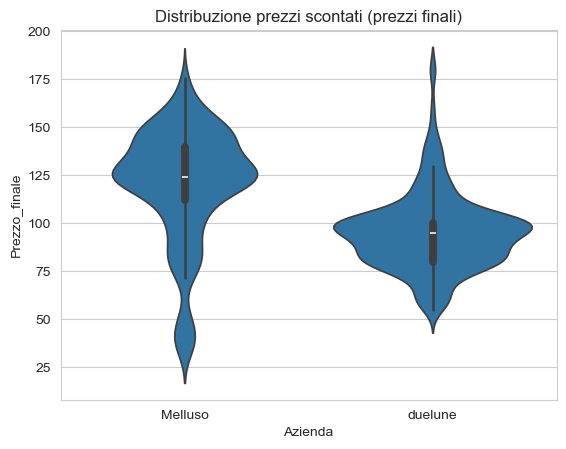

In [156]:
Analisi_distribuzione_prezzi_scontati = sns.violinplot(data=confronto,x='Azienda',y='Prezzo_finale')
Analisi_distribuzione_prezzi_scontati.set_title('Distribuzione prezzi scontati (prezzi finali)')

# Analisi 5: media degli sconti

In [148]:
sconti = confronto.Sconto > 0
maschera_sconti = confronto[sconti]
media_sconti = maschera_sconti.groupby('Azienda').Sconto.agg(Media=('mean'))
media_sconti

,Media
Azienda,
Melluso,18.832508
duelune,14.901492


<Axes: title={'center': 'Media sconti (in %) x azienda'}, xlabel='Azienda'>

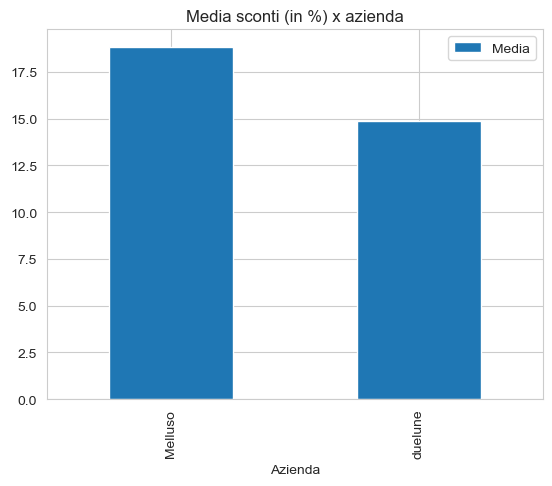

In [152]:
media_sconti.plot(kind='bar',y='Media',title='Media sconti (in %) x azienda')

# Analisi 6: Distribuzione degli sconti

Text(0.5, 1.0, 'Distribuzione sconti (in %) x azienda')

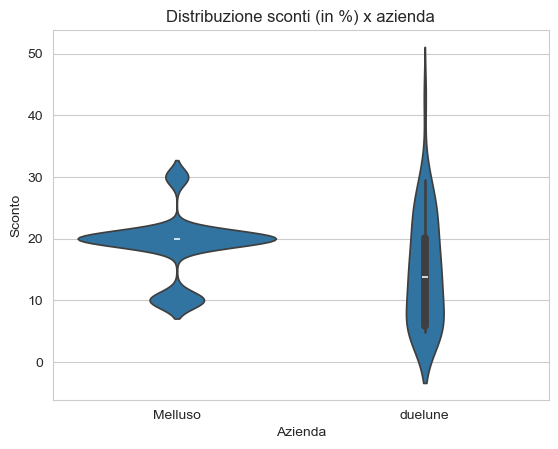

In [154]:
distribuzione_sconti = sns.violinplot(data=maschera_sconti,x='Azienda',y='Sconto')
distribuzione_sconti.set_title('Distribuzione sconti (in %) x azienda')

# Analisi 7: quali e quante categorie ci sono per sesso

In [313]:
categorie_sesso = confronto.groupby(["Azienda", "Sesso"]).Categoria.agg(Quantità="value_counts") 
categorie_sesso

Quantità
Azienda Sesso Categoria                           
Melluso donna tacchi-comodi                    257
              decollete                        174
              donna-mocassini                  103
              stivaletti                        84
              tacchi-alti                       82
              cerimonia                         63
              sneakers                          45
              pantofole                         23
              melluso-donna-stivali-html        15
        uomo  mocassini-uomo                    35
              classiche                         30
              sneakers                          11
              stivaletti                        10
              pantofole                          5
duelune donna decollete                         73
              sneakers                          54
              sandali                           46
              stivali                           39
              ballerine                         31
              scarpe-basse                      25
        uomo  sneakers                          49
              mocassini-slipon                  27
              stivaletti                        23
              stringate                         17
              polacchine                         8
              sandali                            5
              doppia-fibbia                      4
              goodyear-welted                    3

array([<Axes: title={'center': 'Quantità'}, xlabel='Azienda,Sesso,Categoria'>],
      dtype=object)

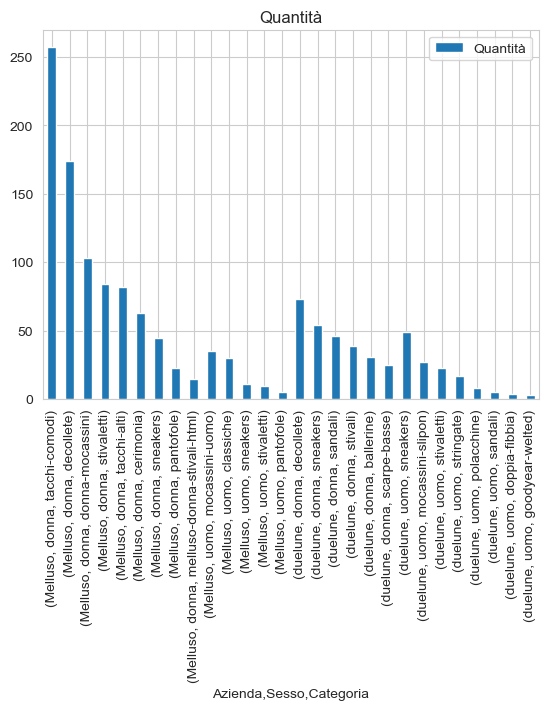

In [315]:
categorie_sesso.plot.bar(subplots=True)

In [317]:
quantita_categorie_sesso = confronto.groupby(["Azienda", "Sesso"]).Categoria.agg(Quantità=('nunique'))
quantita_categorie_sesso

Quantità
Azienda Sesso          
Melluso donna         9
        uomo          5
duelune donna         6
        uomo          8

array([<Axes: ylabel='Quantità'>], dtype=object)

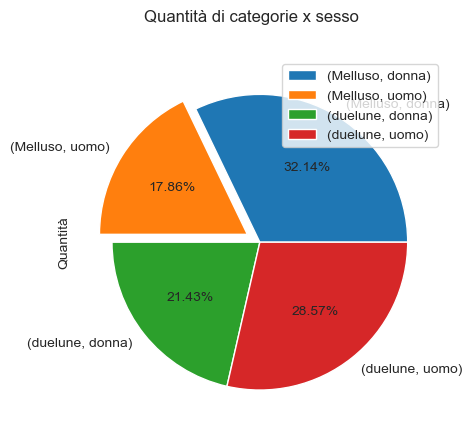

In [329]:
quantita_categorie_sesso.plot(kind='pie',x='Azienda',title='Quantità di categorie x sesso',subplots=True, autopct='%.2f%%' , explode=(0,0.1,0,0))

In [ ]:
quantita_categorie_sesso.plot

# Analisi 8: numero di prodotti per sesso

In [222]:
n_prodotti_sesso = confronto.groupby(['Azienda','Sesso']).Quantita.agg(Quantità=('sum'))
n_prodotti_sesso

Quantità
Azienda Sesso          
Melluso donna       853
        uomo         96
duelune donna       268
        uomo        136

Text(0.5, 1.0, 'Quantità prodotti x sesso')

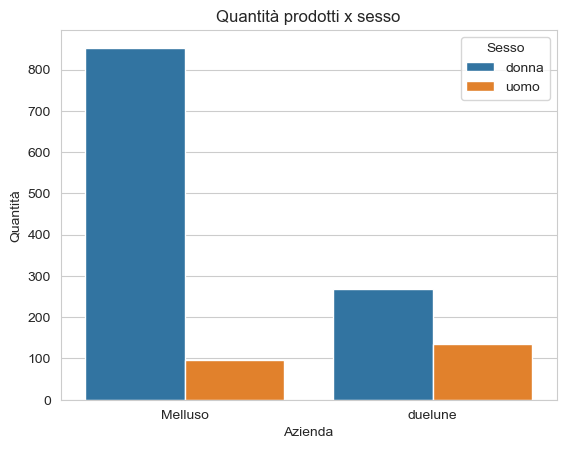

In [224]:
grafico_n_prodotti_sesso = sns.barplot(data=n_prodotti_sesso,x='Azienda',y='Quantità',hue='Sesso')
grafico_n_prodotti_sesso.set_title('Quantità prodotti x sesso')

# Analisi 9: media prezzi per sesso

In [179]:
media_prezzo_sesso = confronto.groupby(['Azienda','Sesso']).Prezzo_originale.agg(Media = ('mean'))
media_prezzo_sesso

Media
Azienda Sesso            
Melluso donna  142.511489
        uomo   144.379167
duelune donna   94.918657
        uomo   101.350735

Text(0.5, 1.0, 'media prezzo x sesso')

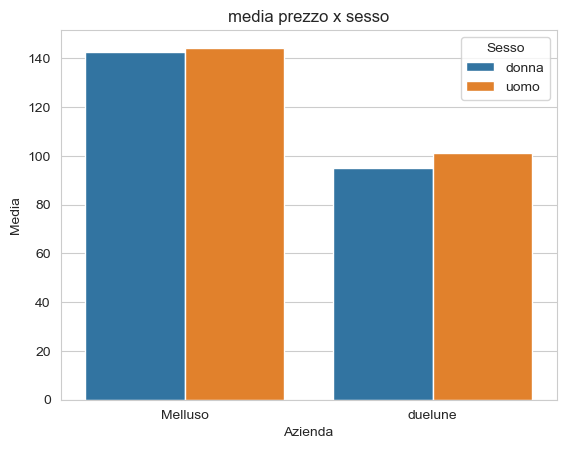

In [181]:
grafico_media_prezzo_sesso = sns.barplot(data=media_prezzo_sesso,x='Azienda',y='Media',hue='Sesso')
grafico_media_prezzo_sesso.set_title('media prezzo x sesso')

In [177]:
media_prezzo_sesso_scontato = confronto.groupby(['Azienda','Sesso']).Prezzo_finale.agg(Media = ('mean'))
media_prezzo_sesso_scontato

Media
Azienda Sesso            
Melluso donna  119.800117
        uomo   125.332187
duelune donna   93.388806
        uomo    99.291912

Text(0.5, 1.0, 'media prezzo scontato (finale) x sesso')

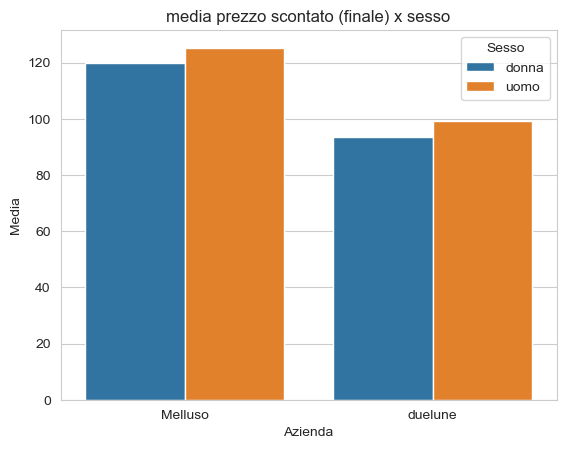

In [185]:
grafico_media_prezzo_sesso_scontato = sns.barplot(data=media_prezzo_sesso_scontato,x='Azienda',y='Media',hue='Sesso')
grafico_media_prezzo_sesso_scontato.set_title('media prezzo scontato (finale) x sesso')

# Analisi 10: distribuzione prezzi per sesso

Text(0.5, 1.0, 'Distribuzione prezzi x sesso x azienda')

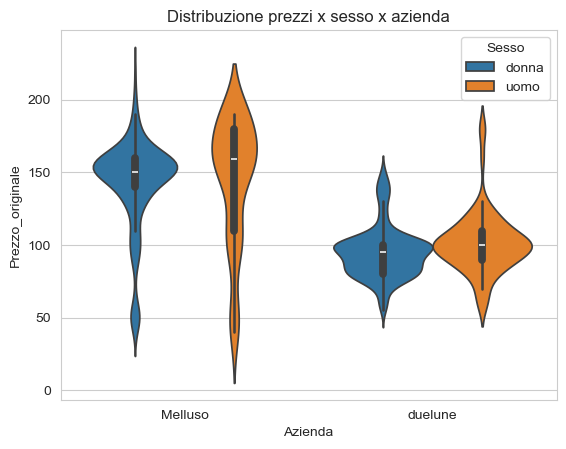

In [187]:
distribuzione_prezzi_sesso = sns.violinplot(data=confronto,x='Azienda',y='Prezzo_originale',hue='Sesso')
distribuzione_prezzi_sesso.set_title('Distribuzione prezzi x sesso x azienda')

Text(0.5, 1.0, 'Distribuzione prezzi scontati (in %) x sesso x azienda')

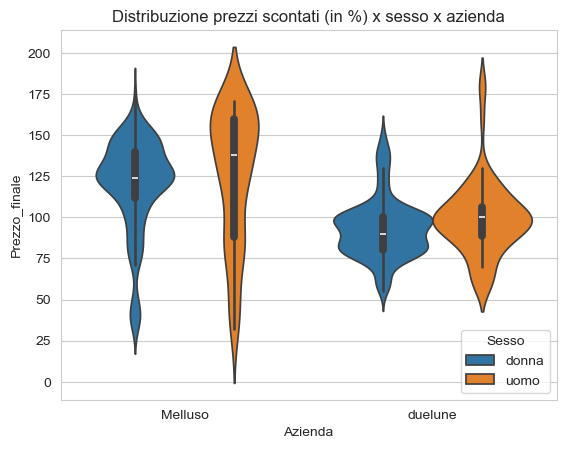

In [189]:
distribuzione_prezzi_scontati_sesso = sns.violinplot(data=confronto,x='Azienda',y='Prezzo_finale',hue='Sesso')
distribuzione_prezzi_scontati_sesso.set_title('Distribuzione prezzi scontati (in %) x sesso x azienda')

# Analisi 11: Media sconti per sesso

In [198]:
media_sconto_sesso = round(confronto.groupby(['Azienda','Sesso']).Sconto.agg(Media = ('mean')),2)
media_sconto_sesso

Media
Azienda Sesso       
Melluso donna  15.94
        uomo   13.51
duelune donna   1.61
        uomo    2.20

Text(0.5, 1.0, 'media sconto x sesso')

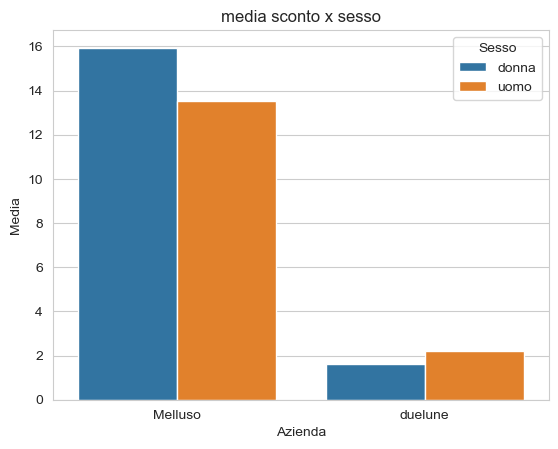

In [200]:
grafico_media_sconto_sesso = sns.barplot(data=maschera_sconti,x='Azienda',y='Media',hue='Sesso')
grafico_media_sconto_sesso.set_title('media sconto x sesso')

# Analisi 12: distribuzione sconti per sesso

Text(0.5, 1.0, 'Distribuzione media prezzi x sesso')

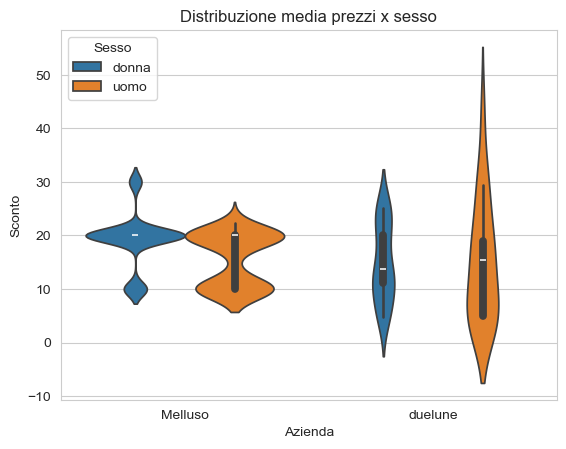

In [206]:
distribuzione_media_sconti_sesso = sns.violinplot(data=maschera_sconti,x='Azienda',y='Sconto',hue='Sesso')
distribuzione_media_sconti_sesso.set_title('Distribuzione media prezzi x sesso')

# Analisi 13: Varietà colori

In [340]:
Analisi_colori = confronto.groupby(['Azienda','Colore']).Quantita.agg(Quantità = ('sum'))
Analisi_colori

Quantità
Azienda Colore              
Melluso abyss             27
        acero             15
        acid               3
        allacciato         2
        antico             2
...                      ...
duelune Verde             14
        Verdone            2
        Wafer              1
        Zucchero           1
        moro               1

[116 rows x 1 columns]